In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import lasio 

In [2]:
# Reading the LAS file using the .read() method from the lasio library
las = lasio.read(r"C:\Users\ORACH PAUL FRANCIS\OneDrive\Desktop\Logs\LAS_Sample_API\49-005-30258.las")

In [3]:
# Viewing the sections of the LAS file
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [4]:
# Accessing the 'Version' section of the LAS file
las.sections["Version"]

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One Line per Depth Ste"),
 HeaderItem(mnemonic="CREA", unit="", value="02-08-2006", descr="LAS File Creat")]

In [5]:
# Find information out about where the file originated from, 
# such as the well name, location and what depth range 
# the file covers, I created a simple for loop to 
# go over each header item. Using Python's f-string I
# joined the items together.
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t {item.value}")

START DEPTH (STRT): 	 10180.0
STOP DEPTH (STOP): 	 10414.0
STEP (STEP): 	 1.0
NULL VALUE (NULL): 	 -999.25
COMPANY (COMP): 	 Cramer Oil
WELL (WELL): 	 #36-16 State
LOCATION (LOC): 	 SE SE 36-47N-71W
COUNTY (CNTY): 	 Campbell
FIELD (FLD): 	 
STATE (STAT): 	 Wyoming
COUNTRY (CTRY): 	 U.S.A.
COMPLETION DATE (MM/YY) (DATE): 	 11/91
API NUMBER (API): 	 49-005-30258-0000
SERVICE COMPANY (SRVC): 	 


In [6]:
# If we wanted to change one of these entries, for example, COUNTRY (CTRY)

las.sections['Well']['CTRY'] = 'United States of America'

In [7]:
# Running the for loop again to see the updated value
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t {item.value}")

START DEPTH (STRT): 	 10180.0
STOP DEPTH (STOP): 	 10414.0
STEP (STEP): 	 1.0
NULL VALUE (NULL): 	 -999.25
COMPANY (COMP): 	 Cramer Oil
WELL (WELL): 	 #36-16 State
LOCATION (LOC): 	 SE SE 36-47N-71W
COUNTY (CNTY): 	 Campbell
FIELD (FLD): 	 
STATE (STAT): 	 Wyoming
COUNTRY (CTRY): 	 United States of America
COMPLETION DATE (MM/YY) (DATE): 	 11/91
API NUMBER (API): 	 49-005-30258-0000
SERVICE COMPANY (SRVC): 	 


In [8]:
# Calling upon the sections in a different way. 
# In this case I used las.well to call upon the well section
las.well.WELL.value

'#36-16 State'

In [9]:
# To quickly see what curve mnemonics are present within
#  the las file I loop through las.curves and print the mnemonic.
for curve in las.curves:
    print(curve.mnemonic)

DEPT
DT
RESD
SP
GR


In [10]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: F, 	 Description: 1 DEPTH
Curve: DT, 	 Units: US/F, 	 Description: 2 SONIC DELTA-T
Curve: RESD, 	 Units: OHMM, 	 Description: 3 DEEP RESISTIVITY
Curve: SP, 	 Units: MV, 	 Description: 4 SP CURVE
Curve: GR, 	 Units: GAPI, 	 Description: 5 GAMMA RAY
There are a total of: 5 curves present within this file


In [11]:
# Curves can be easily deleted from the las file 
# using the .remove_curve() method or .delete_curve() method.
# las.delete_curve('DEPT')
# To see the updated curves, we can loop through las.curves
# again (But I am going to comment this out so that the DEPT curve is not deleted)
#for curve in las.curves:
#    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")

In [12]:
# Write the modified LAS file to a new file
las.write(r'C:\Users\ORACH PAUL FRANCIS\OneDrive\Desktop\\Logs\49-005-30258_Exported.las')

In [13]:
# Data loaded in using LASIO can be converted to a pandas 
# dataframe using the .df() function. This allows us to 
# easily plot data and pass it into one of the many machine learning algorithms
well = las.df()

In [14]:
# The .head() function generates a table view of the header 
# and the first 5 rows within the dataframe.
well.head()

,DT,RESD,SP,GR
DEPT,,,,
10180.0,59.9,22.0,45.6,116.0
10181.0,59.9,21.0,49.0,114.0
10182.0,60.5,19.7,53.0,127.0
10183.0,63.5,18.9,55.6,150.0
10184.0,64.5,18.2,58.4,155.0


In [15]:
# To find out more information about data, we can call 
# upon the .info() and .describe() functions.
# The .info() function provides information about the 
# data types and how many non-null values are present within each curve.
# The .describe() function, provides statistical information
#  about each curve and can be a useful QC for each curve.
well.info()
well.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 10180.0 to 10414.0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      235 non-null    float64
 1   RESD    235 non-null    float64
 2   SP      235 non-null    float64
 3   GR      235 non-null    float64
dtypes: float64(4)
memory usage: 9.2 KB


,DT,RESD,SP,GR
count,235.000000,235.000000,235.000000,235.000000
mean,60.395745,190.892340,65.796596,57.804255
std,8.125205,502.387133,28.744930,48.867560
min,45.800000,1.340000,18.200000,0.000000
25%,52.400000,8.050000,40.500000,18.000000
50%,61.700000,18.000000,65.900000,32.000000
75%,65.000000,52.500000,95.500000,114.000000
max,78.300000,2113.000000,109.700000,155.000000


array([[<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>],
       [<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>],
       [<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>],
       [<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>]], dtype=object)

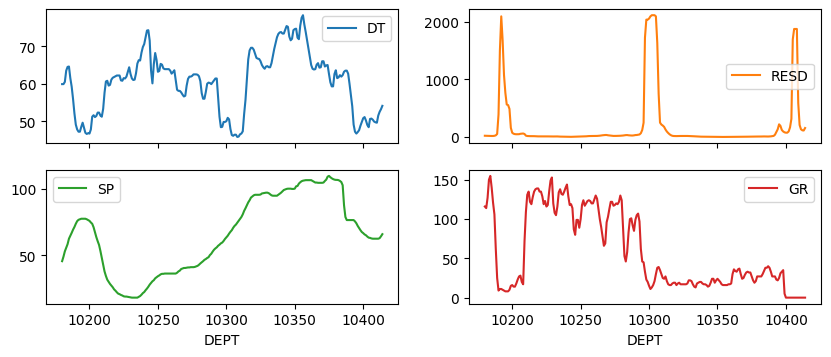

In [16]:
# Using the ploting function within pandas, we can plot all curves on a different plot.
well.plot(figsize=(10, 8), subplots=True, layout=(4, 2), sharex=True)

<Axes: title={'center': 'Gamma Ray'}, xlabel='DEPT', ylabel='Gamma Ray (API)'>

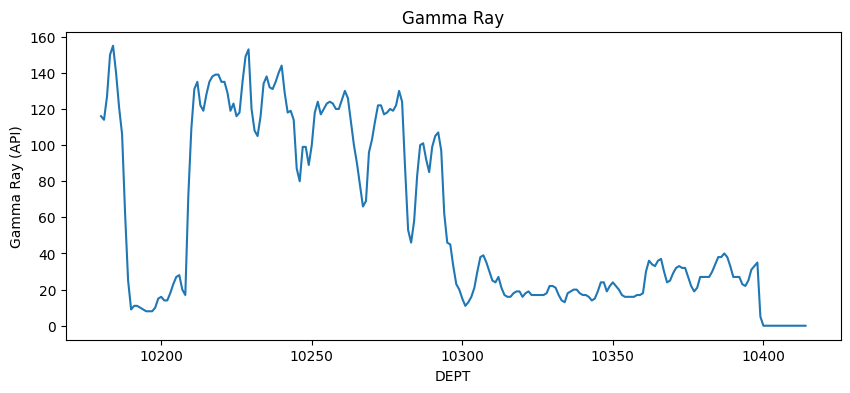

In [ ]:
# Plotting a single curve, in this case the GR curve.
well['GR'].plot(figsize=(10, 4), title='Gamma Ray', ylabel='Gamma Ray (API)')